In [1]:
from BondFlow.data import utils as iu


/home/fit/lulei/WORK/.conda/envs/apm_env/lib/python3.10/site-packages/deepspeed/runtime/zero/linear.py:44: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  def forward(ctx, input, weight, bias=None):
/home/fit/lulei/WORK/.conda/envs/apm_env/lib/python3.10/site-packages/deepspeed/runtime/zero/linear.py:70: FutureWarning: `torch.cuda.amp.custom_bwd(args...)` is deprecated. Please use `torch.amp.custom_bwd(args..., device_type='cuda')` instead.
  def backward(ctx, grad_output):


In [2]:
from BondFlow.data.dataloader import generate_crop_target_pdb
from hydra import initialize, compose
import os
#pdb_file = "/home/fit/lulei/WORK/xjt/Protein_design/CyclicPeptide/Dataset/ALL_MMCIF/CIF_ALL_DATASET/3T0U.cif" #LINK AND SSBOND
#pdb_file = "/home/fit/lulei/WORK/xjt/Protein_design/CyclicPeptide/Dataset/ALL_MMCIF/CIF_ALL_DATASET/1UCY.cif"#插入的
#pdb_file = "/home/fit/lulei/WORK/xjt/Protein_design/CyclicPeptide/Dataset/ALL_MMCIF/CIF_ALL_DATASET/6QSW.cif"
#pdb_file = "/home/fit/lulei/WORK/xjt/Protein_design/CyclicPeptide/Dataset/ALL_MMCIF/CIF_ALL_DATASET/1OR8.cif"
#pdb_file = "/home/fit/lulei/WORK/xjt/Protein_design/CyclicPeptide/Dataset/ALL_MMCIF/CIF_ALL_DATASET/1QG8.cif"
#pdb_file = "/home/fit/lulei/WORK/xjt/Protein_design/CyclicPeptide/Dataset/ALL_MMCIF/CIF_ALL_DATASET/2R16.cif"
#pdb_file = "/home/fit/lulei/WORK/xjt/Protein_design/CyclicPeptide/Dataset/ALL_MMCIF/isopept/exacted_bonds2/success/AF-Q971J4-F1-model_v4.cif" #7RRO_6
#N C环肽 ssbond
#pdb_file = "/home/fit/lulei/WORK/xjt/Protein_design/CyclicPeptide/Dataset/ALL_MMCIF/train_data/LINK_CIF/1BH4.cif"
#pdb_file = "/home/fit/lulei/WORK/xjt/Protein_design/CyclicPeptide/Dataset/ALL_MMCIF/train_data/LINK_CIF/2OQJ.cif"
#pdb_file = "/WORK/PUBLIC/lulei_work/xjt/Protein_design/CyclicPeptide/Dataset/ALL_MMCIF/train_data5/LINK_TERM_MONO_CIF/9CDT@B.cif" # 头尾环肽复合物
# isopeptide
#pdb_file = "/home/fit/lulei/WORK/xjt/Protein_design/CyclicPeptide/Dataset/ALL_MMCIF/train_data/LINK_CIF/AF-Q58972-F1-model_v4.cif"

pdb_file = "/home/fit/lulei/WORK/xjt/Protein_design/CyclicPeptide/Dataset/ALL_MMCIF/train_data5/COMPLEX_CIF/7Q44_B__7Q44_A.cif"  #complex_bond
target_feats = iu.process_target(pdb_file , parse_hetatom=True,parse_link=True, center=False,
                                    link_csv_path="/home/fit/lulei/WORK/xjt/Protein_design/BondFlow/BondFlow/config/link.csv")
print(target_feats['idx'])
print(target_feats['pdb_idx'])
print(target_feats['links'])
print(target_feats.keys())
# 只有CA  1A1Q
config_file = "/home/fit/lulei/WORK/xjt/Protein_design/BondFlow/BondFlow/config/base.yaml"
config_path = os.path.dirname(config_file)
config_path = os.path.relpath(config_path)
config_name = os.path.basename(config_file).split(".yaml")[0]

# 创建模型 + DDP包装 
with initialize(version_base=None, config_path=config_path):
    conf = compose(config_name=config_name)

contig, res_mask,hotspot = iu.generate_crop_contigs(
    target_feats,
    "B",
    mode="complex",
    crop_length=250,
    fixed_res=None,
    expand_preference="auto",
    target_expand_bias=1,
    target_len_ratio= 0.5,
    hotspot_k_range = (1,5),
)
print(contig)
print("hot",hotspot)
contig_new = conf
# Bond condition is now handled by randomly_fix_bonds or should be managed by the config, not here.
contig_new.design_config.bond_condition = None
contig_new.design_config.contigs = contig
contig_new.design_config.hotspots = hotspot 

# contig_new.design_config.partial_t = 0.1
target = iu.Target(contig_new.design_config, target_feats, N_C_add=True, 
                    nc_training=True, nc_pos_prob=0.75)



#target,_,_ = generate_crop_target_pdb(pdb_file, 'B', 'complex', conf, crop_length=30, fixed_res=None, N_C_add=True,
#                                            target_expand_bias = 0.1,target_len_ratio=0.1,) #{'proportion': 0.2, 'segments': 1}
#target = iu.Target(conf.design_config,target_feats)

plm_encoder is None
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 21

In [3]:
import numpy as np
import matplotlib.pyplot as plt
def plot_tensor_heatmap(tensor, title="Tensor Heatmap", cmap="viridis"):
    """
    绘制L×L tensor矩阵的热图
    
    参数:
    tensor -- 输入的L×L矩阵
    title -- 热图标题(可选)
    cmap -- 颜色映射(可选)
    """
    plt.figure(figsize=(8, 6))
    
    # 显示热图
    im = plt.imshow(tensor, cmap=cmap)
    
    # 添加颜色条
    plt.colorbar(im, fraction=0.046, pad=0.04)
    
    # 设置标题和坐标轴
    plt.title(title)
    plt.xlabel("Column Index")
    plt.ylabel("Row Index")
    
    # 显示网格线(可选)
    plt.grid(False)
    
    plt.show()

In [4]:
target.__dict__.keys()

dict_keys(['design_conf', 'N_C_add', 'chain_order', 'pdb', 'chain_list', 'nter_indices', 'cter_indices', '_origin_to_body_idx', '_origin_to_nter_idx', '_origin_to_cter_idx', 'full_head_mask', 'full_tail_mask', 'full_seq', 'full_xyz', 'full_rf_idx', 'full_mask_str', 'full_mask_seq', 'full_pdb_idx', 'full_origin_pdb_idx', 'full_alpha', 'full_alpha_alt', 'full_alpha_tor_mask', 'full_chain_ids', 'full_N_C_anchor', 'full_bond_matrix', 'full_bond_mask', 'full_hotspot'])

In [5]:
import torch
idx = torch.where(target.full_hotspot==1)
target.full_hotspot

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 

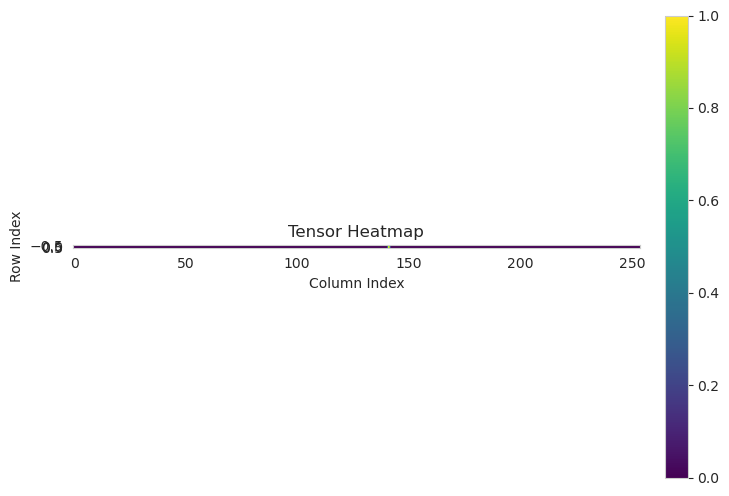

NameError: name 'aaaaa' is not defined

In [6]:
plot_tensor_heatmap(target.full_hotspot.unsqueeze(0))
print(aaaaa)

In [ ]:
for link in target_feats['links']:
    print(link)

{'res1': 'LYS', 'idx1': ('B', '17'), 'atom1': 'NZ', 'res2': 'GLU', 'idx2': ('B', '121'), 'atom2': 'CD', 'distance': 1.3347075}
{'res1': 'LYS', 'idx1': ('B', '132'), 'atom1': 'NZ', 'res2': 'GLU', 'idx2': ('B', '7'), 'atom2': 'CD', 'distance': 1.3340298}
{'res1': 'LYS', 'idx1': ('B', '144'), 'atom1': 'NZ', 'res2': 'ASP', 'idx2': ('B', '94'), 'atom2': 'CG', 'distance': 1.3340211}
{'res1': 'SER', 'idx1': ('C', '3'), 'atom1': 'OG', 'res2': 'ASP', 'idx2': ('C', '6'), 'atom2': 'CG', 'distance': 1.3838979}
{'res1': 'SER', 'idx1': ('C', '52'), 'atom1': 'OG', 'res2': 'ASP', 'idx2': ('C', '47'), 'atom2': 'CG', 'distance': 1.3751645}


In [ ]:
target.__dict__.keys()
import torch
for key in target.__dict__.keys():
    #if  in key:
    print(key)
    if isinstance(target.__dict__[key], torch.Tensor):
        print(target.__dict__[key].shape)
    elif isinstance(target.__dict__[key], list):
        print(len(target.__dict__[key]))
    else:
        print(target.__dict__[key])

design_conf
{'contigs': [['A/1-A/30:seq_PNA:str_PNA', 'New_20-20']], 'input_pdb': '/home/fit/lulei/WORK/xjt/Protein_design/CyclicPeptide/Dataset/ALL_PDB/PDB_ALL_DATASET/3A55.pdb', 'length': None, 'partial_t': 0.1, 'bond_condition': None}
N_C_add
True
chain_order
ABCDEFGHIJKLMNOPQRSTUVWXYZ
pdb
{'xyz_14': tensor([[[ 4.2310,  1.6930, -6.0880],
         [ 4.9240,  0.4730, -5.5760],
         [ 4.1440, -0.7550, -6.0500],
         ...,
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000]],

        [[ 2.8400, -0.6750, -5.9190],
         [ 1.9680, -1.8000, -6.3430],
         [ 0.6440, -1.2650, -6.8740],
         ...,
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000]],

        [[-0.2850, -1.0880, -5.9660],
         [-1.6550, -0.5770, -6.3140],
         [-2.5970, -0.5750, -5.1020],
         ...,
         [ 0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000],
   

Indices where bond matrix equals 1:
Row indices: tensor([  3,   6,  47,  52, 243, 253, 330, 357, 368, 380])
Column indices: tensor([  6,   3,  52,  47, 368, 357, 380, 253, 243, 330])
Number of bonds: 10


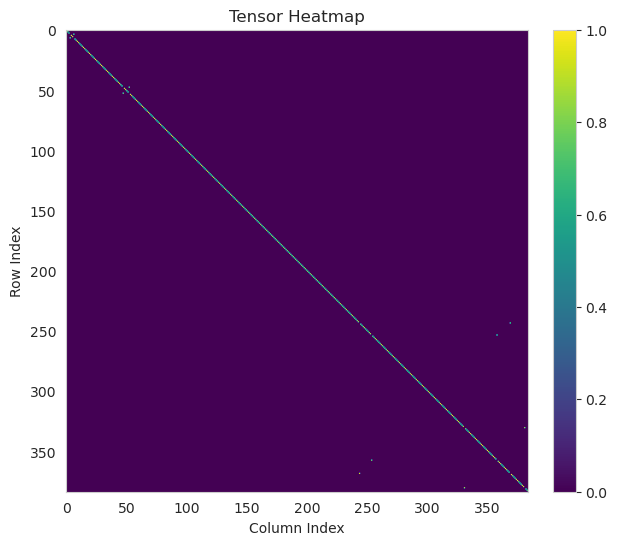

In [ ]:
import torch
bond_indices = torch.where(target.full_bond_matrix * (1-torch.eye(target.full_bond_matrix.shape[0])) == 1)
print("Indices where bond matrix equals 1:")
print(f"Row indices: {bond_indices[0]}")
print(f"Column indices: {bond_indices[1]}")
print(f"Number of bonds: {len(bond_indices[0])}")
plot_tensor_heatmap(target.full_bond_matrix)

In [ ]:
from rfdiff.util import writepdb
import torch
outfile = "/home/fit/lulei/WORK/xjt/Protein_design/BondFlow/BondFlow/tests/output.pdb"
res = target.full_seq
print(res.shape)
from BondFlow.models.allatom_wrapper import AllAtomWrapper
device = torch.device("cuda")
allatom = AllAtomWrapper(backend='apm', device='cuda').to(device)
print(target.full_seq.shape)
print(target.full_xyz.shape)
print(target.full_alpha.shape)
print(target.full_bond_matrix.shape)
res_mask = target.res_mask
head_mask = target.full_head_mask
tail_mask = target.full_tail_mask
print(res_mask.shape)
final_res_mask = res_mask.float() * (1 - head_mask.float()) * (1 - tail_mask.float())
print(final_res_mask)
_,filtered_atoms = allatom(
    seq=torch.tensor(target.full_seq).long().unsqueeze(0).to(device),
    xyz_bb=torch.tensor(target.full_xyz)[:,:3,:].unsqueeze(0).to(device),
    alphas_sincos=torch.tensor(target.full_alpha).unsqueeze(0).to(device),
    bond_mat=torch.tensor(target.full_bond_matrix).unsqueeze(0).to(device),
    link_csv_path="/home/fit/lulei/WORK/xjt/Protein_design/BondFlow/BondFlow/config/link.csv",
    res_mask=final_res_mask.unsqueeze(0).to(device),
)
print("filtered_atoms")
print(filtered_atoms[0,0])
print(filtered_atoms[0,1])
print(res.shape)
# Write the PDB file
writepdb(outfile, filtered_atoms, res, binderlen=None)

torch.Size([52])
torch.Size([52])
torch.Size([52, 14, 3])
torch.Size([52, 10, 2])
torch.Size([52, 52])
torch.Size([52])
tensor([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


/tmp/ipykernel_1034847/2700641819.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  seq=torch.tensor(target.full_seq).long().unsqueeze(0).to(device),
/tmp/ipykernel_1034847/2700641819.py:21: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xyz_bb=torch.tensor(target.full_xyz)[:,:3,:].unsqueeze(0).to(device),
/tmp/ipykernel_1034847/2700641819.py:22: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  alphas_sincos=torch.tensor(target.full_alpha).unsqueeze(0).to(device),
/tmp/ipykernel_1034847/2700641819.py:23: UserWarning: To copy construct from

filtered_atoms
tensor([[nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan],
        [nan, nan, nan]], device='cuda:0')
tensor([[ 4.2961,  1.7032, -6.0448],
        [ 4.9240,  0.4730, -5.5760],
        [ 4.1471, -0.7501, -6.0481],
        [ 4.7271, -1.7113, -6.5507],
        [ 5.0220,  0.4687, -4.0508],
        [ 6.6449,  0.9545, -3.4242],
        [    nan,     nan,     nan],
        [    nan,     nan,     nan],
        [    nan,     nan,     nan],
        [    nan,     nan,     nan],
        [    nan,     nan,     nan],
        [    nan,     nan,     nan],
        [    nan,     nan,     nan],
        [    nan,     nan,     nan]], device='cuda:0')
torch.Size([52])


In [ ]:
from BondFlow.models.Loss import *
import os
os.environ["CUDA_LAUNCH_BLOCKING"] = "1"
link_csv_path = "/home/fit/lulei/WORK/xjt/Protein_design/BondFlow/BondFlow/config/link.csv"
device = 'cuda'

criterion_bond_coh = BondCoherenceLoss(link_csv_path=link_csv_path, device=device,
                        t_geom_threshold=0.8,use_seq_logits=False)
L,L = target.full_bond_matrix.shape

print(torch.isnan(target.full_bond_matrix.unsqueeze(0).to(device)).any())
print(torch.isnan(res_mask.unsqueeze(0).to(device)).any())
print(torch.isnan(target.full_seq.unsqueeze(0).to(device)).any())
print(torch.isnan((res_mask[None,:,None] * res_mask[None,None,:] * target.full_bond_mask.unsqueeze(0).float()).bool().to(device)).any())
print(torch.isnan(filtered_atoms.to(device)).any())
print(torch.isnan(target.full_seq.unsqueeze(0).to(device)).any())
print(torch.isnan(torch.ones(1, device='cuda')).any())
print(torch.isnan(head_mask.unsqueeze(0).to(device)).any())
print(torch.isnan(tail_mask.unsqueeze(0).to(device)).any())
seq = torch.where(target.full_seq == 20, 0, target.full_seq)
loss_bond_coh = criterion_bond_coh(
    bond_matrix=target.full_bond_matrix.unsqueeze(0).to(device),
    res_mask=res_mask.unsqueeze(0).to(device),
    seq_labels=seq.unsqueeze(0).to(device),
    mask_2d=(res_mask[None,:,None] * res_mask[None,None,:] * target.full_bond_mask.unsqueeze(0).float()).bool().to(device),
    all_atom_coords = filtered_atoms.to(device),
    aatype = target.full_seq.unsqueeze(0).to(device),
    t = torch.ones(1, device='cuda'),
    head_mask=head_mask.unsqueeze(0).to(device),
    tail_mask=tail_mask.unsqueeze(0).to(device),
)
print(loss_bond_coh)

tensor(False, device='cuda:0')
tensor(False, device='cuda:0')
tensor(False, device='cuda:0')
tensor(False, device='cuda:0')
tensor(True, device='cuda:0')
tensor(False, device='cuda:0')
tensor(False, device='cuda:0')
tensor(False, device='cuda:0')
tensor(False, device='cuda:0')
bond_thresh_mask: 8
bond_thresh_mask_num: 0.9999998750000157
dist[valid_final]: tensor([[ 7.5360,  7.5360,  7.6090,  7.6090,  7.6090],
        [ 3.8481,  3.8481,  5.8409,  5.8409,  5.8409],
        [ 2.5443,  2.5443,  5.2403,  5.2403,  5.2403],
        [ 6.6145,  6.6145,  7.0761,  7.0761,  7.0761],
        [ 4.1787,  4.1787,  2.9294,  2.9294,  2.9294],
        [ 2.2246,  2.2246,  3.0794,  3.0794,  3.0794],
        [ 7.5360,  7.5360,  7.6090,  7.6090,  7.6090],
        [ 5.3991,  5.3991,  9.5467,  5.3991,  5.3991],
        [11.1301, 11.1301, 10.7292, 10.7292, 10.7292],
        [ 8.6447,  8.6447, 11.3980, 11.3980, 11.3980],
        [ 2.0559,  2.0559,  7.9116,  7.9116,  7.9116],
        [11.6460, 11.6460,  9.5361,  

In [ ]:
res_mask.shape

torch.Size([52])

In [ ]:
print(aaaaaaaa)

NameError: name 'aaaaaaaa' is not defined

In [ ]:
target_feats['links']

In [ ]:
import torch
target_feats.keys()
for k,v in target_feats.items():
    if isinstance(v, list):
        print(k, len(v))
    elif isinstance(v, torch.Tensor):
        print(k, v.shape)
    elif isinstance(v, str):
        print(k, v)
for i in range(len(target_feats['pdb_idx'])):
    print(target_feats['pdb_idx'][i], target_feats['idx'][i])

In [ ]:
import torch
torch.set_printoptions(profile="full")
target.__dict__.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def plot_tensor_heatmap(tensor, title="Tensor Heatmap", cmap="viridis"):
    """
    绘制L×L tensor矩阵的热图
    
    参数:
    tensor -- 输入的L×L矩阵
    title -- 热图标题(可选)
    cmap -- 颜色映射(可选)
    """
    plt.figure(figsize=(8, 6))
    
    # 显示热图
    im = plt.imshow(tensor, cmap=cmap)
    
    # 添加颜色条
    plt.colorbar(im, fraction=0.046, pad=0.04)
    
    # 设置标题和坐标轴
    plt.title(title)
    plt.xlabel("Column Index")
    plt.ylabel("Row Index")
    
    # 显示网格线(可选)
    plt.grid(False)
    
    plt.show()

# 示例使用
if __name__ == "__main__":
    # 创建一个示例的10×10 tensor矩阵
    L = 10
    example_tensor = np.random.rand(L, L)  # 随机矩阵
    
    # 绘制热图
    plot_tensor_heatmap(target.full_bond_mask, title="10×10 Random Tensor Heatmap")
    plot_tensor_heatmap(target.full_bond_matrix, title="10×10 Random Tensor Heatmap")

In [ ]:
import torch
torch.set_printoptions(profile="full")
print(target_feats['links'])
torch.set_printoptions(profile="default")
print(target_feats['pdb_idx'])
print(target_feats['idx'])
print(len(target_feats['idx']))
print(target_feats['seq'].shape)
print(target_feats['xyz_27'].shape)
a = 0
for i in range(len(target_feats['idx'])):
    if target_feats['idx'][i]-a > 1:
        print(i)
    a=target_feats['idx'][i]

In [ ]:
# 打印map所有的属性
print(target_feats.keys())  # Print the keys of the target_feats dictionary
 # Print the ContigMap object
print(map.__dict__.keys())
for key, value in map.__dict__.items():
    print(f"{key}: {value}\n")



In [ ]:
print(map.get_mappings())

In [ ]:
import torch
torch.set_printoptions(profile="full")
print(target_feats['pdb_idx'])
print(target_feats['xyz_27'].shape)
for i in range(len(target_feats['pdb_idx'])):
    if target_feats['pdb_idx'][i][1] + 1 != target_feats['pdb_idx'][i+1][1]:
        print(target_feats['pdb_idx'][i])
torch.set_printoptions(profile="default") # reset
